<a href="https://colab.research.google.com/github/Nardos-Amakele/Naive-Bayes/blob/master/Naive_logestic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**


The Titanic sank in the year 1912, and over 1,500 individuals perished. In this project, we attempt to predict whether a passenger survived or not using age, sex, fare, and family size. We employ two binary classification algorithms, Naïve Bayes and Logistic Regression, to analyze survival patterns. For improving model performance, we perform Exploratory Data Analysis (EDA), clean and preprocess the dataset, and evaluate both classifiers' performance based on accuracy, classification reports, and confusion matrices. We aim to find out which model gives more accurate predictive power for this dataset.

Cell 1: Import Libraries and Load Dataset Imported the necessary libraries: seaborn and pandas. The Titanic dataset was loaded from seaborn since it includes it as an example datase. Loaded the head of the dataset for observation.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

print("Dataset Info:\n")
titanic.info()

titanic.head()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Cell 2: Checking and cleaning the dataset. Checked for missing values in the dataset. 'deck', 'embark_town', 'alive', 'class', 'who', and 'adult_male' were identified as irrelevant: 'deck' had a significant number of missing values (688), so it was dropped. 'embark_town', 'alive', 'class', 'who', and 'adult_male' were dropped as they may introduce noise. The missing values in the 'age' column were filled with the median age value (to avoid skewing the data with extreme values). The 'embarked' column had two missing values, which were filled with the most frequent (mode) value. Encode categorical variables like 'sex' and 'embarked'.

In [ ]:
print("Missing values:\n", titanic.isnull().sum())

titanic_cleaned = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

titanic_cleaned['age'] = titanic_cleaned['age'].fillna(titanic_cleaned['age'].median())
titanic_cleaned['embarked'] = titanic_cleaned['embarked'].fillna(titanic_cleaned['embarked'].mode()[0])

titanic_cleaned = pd.get_dummies(titanic_cleaned, columns=['sex', 'embarked'], drop_first=True)

print("\nCleaned Dataset Info:\n")
titanic_cleaned.info()


Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Cleaned Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   alone       891 non-null    bool   
 7   sex_male    891 non-null    bool   
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


Cell 3: Performed EDA by visualizing the survival distribution, numerical feature distributions, and feature correlations to understand data patterns and relationships. The output showed the relationship between this different features.
For example:  The output heatmap shows the correlation between different features in the Titanic dataset, where red indicates strong positive correlations and blue represents strong negative correlations. Notably, sex_male has a strong negative correlation with survived, indicating that females had a higher survival rate. Similarly, fare has a positive correlation with survived, suggesting that passengers who paid higher fares had better survival chances.

<ipython-input-9-194e8ed042d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=titanic, palette='coolwarm')


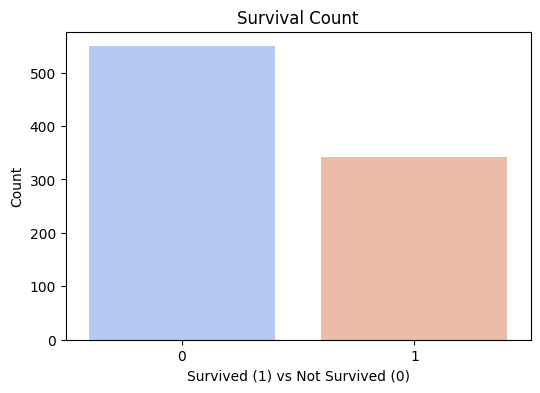

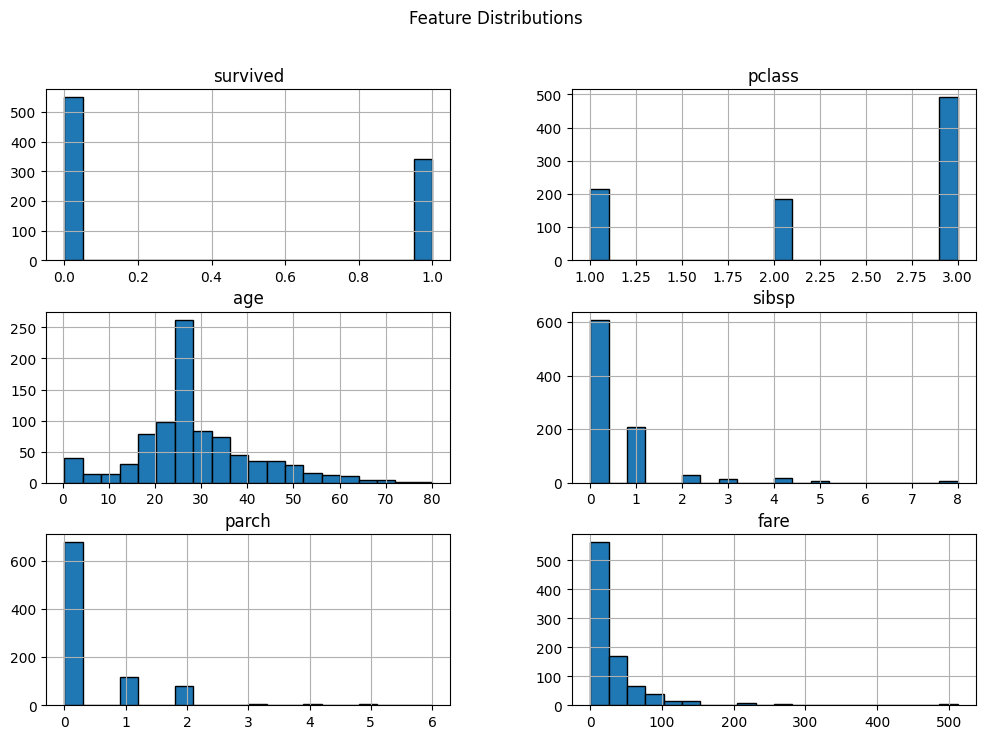

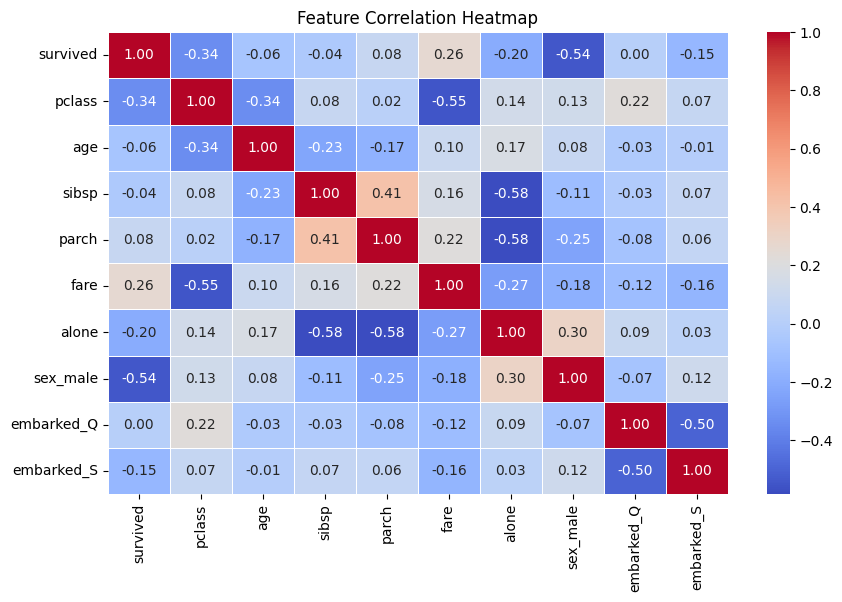

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=titanic, palette='coolwarm')
plt.title("Survival Count")
plt.xlabel("Survived (1) vs Not Survived (0)")
plt.ylabel("Count")
plt.show()

titanic_cleaned.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(titanic_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Cell 4: Feature Selection Created a new feature 'family_size', which combines 'sibsp' (siblings/spouses aboard) and 'parch' (parents/children aboard) into a single feature. To help the model better understand family relationships and survival. The dropped 'sibsp' and 'parch' Numerical features 'age', 'fare', and 'family_size' were standardized using StandardScaler to normalize the values, ensuring no one feature dominates due to scale differences. Lately, defined the target variable 'survived' and the features 'X' used.

In [ ]:
from sklearn.preprocessing import StandardScaler

titanic_cleaned['family_size'] = titanic_cleaned['sibsp'] + titanic_cleaned['parch']
titanic_cleaned = titanic_cleaned.drop(['sibsp', 'parch'], axis=1)

X = titanic_cleaned.drop('survived', axis=1)
y = titanic_cleaned['survived']

scaler = StandardScaler()
X[['age', 'fare', 'family_size']] = scaler.fit_transform(X[['age', 'fare', 'family_size']])

X.head()


,pclass,age,fare,alone,sex_male,embarked_Q,embarked_S,family_size
0,3,-0.565736,-0.502445,False,True,False,True,0.059160
1,1,0.663861,0.786845,False,False,False,False,0.059160
2,3,-0.258337,-0.488854,True,False,False,True,-0.560975
3,1,0.433312,0.420730,False,False,False,True,0.059160
4,3,0.433312,-0.486337,True,True,False,True,-0.560975


Cell 5: Spliting the dataset into training (80%) and testing (20%) sets using train_test_split. The shapes of the resulting sets are printed.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 8) (712,)
Testing set shape: (179, 8) (179,)


Cell 6: initialized a Gaussian Naïve Bayes classifier, trains it on the training set, and predicts labels for the test set. It then evaluates performance using accuracy score, classification report, and confusion matrix, displaying key metrics like precision, recall, and F1-score.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\nNaïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.7932960893854749

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179


Naïve Bayes Confusion Matrix:
 [[88 17]
 [20 54]]


Cell 7: initializes a Logistic Regression classifier, trains it on the training set, and makes predictions on the test set. Similar to Naïve Bayes, it evaluates the model using accuracy score, classification report, and confusion matrix to compare performance.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7988826815642458

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Logistic Regression Confusion Matrix:
 [[90 15]
 [21 53]]


Cell 8: This cell creates a function that draws a confusion matrix using a heatmap. The confusion matrix shows how many predictions were correct and how many were wrong. It helps us see how well each model is working. The function is used twice—once for Naïve Bayes and once for Logistic Regression.

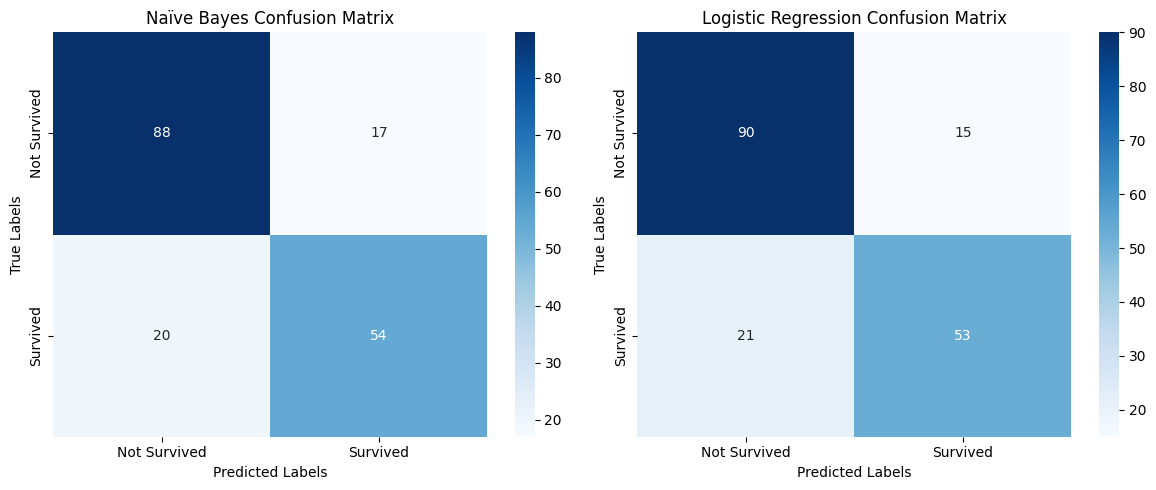

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_test, y_pred_nb, y_pred_log):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
    sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'], ax=axes[0])
    axes[0].set_title("Naïve Bayes Confusion Matrix")
    axes[0].set_xlabel("Predicted Labels")
    axes[0].set_ylabel("True Labels")

    conf_matrix_log = confusion_matrix(y_test, y_pred_log)
    sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'], ax=axes[1])
    axes[1].set_title("Logistic Regression Confusion Matrix")
    axes[1].set_xlabel("Predicted Labels")
    axes[1].set_ylabel("True Labels")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(y_test, y_pred_nb, y_pred_log)


Both models performed similarly, but Logistic Regression slightly outperformed Naïve Bayes in terms of accuracy.

Differences:
Accuracy:

Logistic Regression: Higher accuracy, as seen in fewer misclassifications.
Naïve Bayes: Slightly lower accuracy due to its assumptions about feature independence.
Confusion Matrix Comparison:

Logistic Regression correctly classified 90 "Not Survived" cases, compared to 88 in Naïve Bayes.
For "Survived" cases, Logistic Regression misclassified 21, while Naïve Bayes misclassified 20.

Why I think Logistic Regression Performed better?
Naïve Bayes assumes independence between features which is quite unrealistic. Logistic Regression performed better because it models relationships between features more effectively, while Naïve Bayes' strong independence assumption led to slightly worse predictions.